# ChiaLing - Assignment 4  (KMeans_Algorithm)

In [3]:
import myKmeans as mykmeans;
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time

seed = 37198600   # set random seed
rng = np.random.RandomState(seed)

This is the experiment based on Iris data Set

This is Original Kmeans :
inital centroids
[array([ 0.39403195, -0.39763183]), array([ 0.64973894, -0.49877679]), array([-1.40973759,  1.1636137 ])]
--- 0.33123302459716797 seconds ---
inital centroids
[array([-0.44346028,  1.53212805]), array([-1.46359829,  0.68151055]), array([ 1.03625692,  0.42984317])]
--- 0.30523014068603516 seconds ---
This is Kmeans_Multi
inital centroids
[array([ 0.39403195, -0.39763183]), array([ 0.3126249 ,  0.85074457]), array([ 1.05377365,  0.44507263])]
inital centroids
[array([ 0.69026987,  1.17202696]), array([ 0.9384315 , -0.83432936]), array([ 0.43452585,  0.06892915])]
inital centroids
[array([ 0.45515005, -0.65070875]), array([ 1.05701516, -0.43886467]), array([ 1.16547354, -0.94287947])]
inital centroids
[array([ 0.08833793,  1.68305428]), array([ 0.67738094,  0.41593215]), array([-0.2494833 ,  2.57368258])]
inital centroids
[array([-0.09366713,  1.38111424]), array([ 0.18317002,  0.59449292]), array([-1.30521934,  0.21749888])]
inital centroids
[ar

C:\Users\howfungirl\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\howfungirl\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


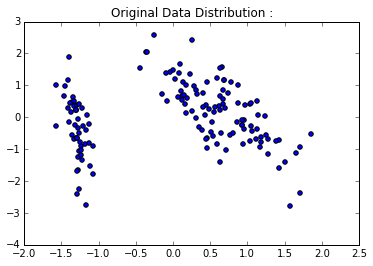

In [4]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.decomposition import PCA

# load iris data set
iris = load_iris()
X, y = iris.data, iris.target
#print(iris.keys())
n_samples, n_features = iris.data.shape  # found out the number of samples and features



#######  Using PCA to trim the 4D into 2D locations
pca = PCA(n_components=2)                
#print(n_samples)
#print (X)
X_new = pca.fit_transform(X,y)
#print(X_new)
#print(n_features)
############  End of PCA  ###################

#############  Normalization  ###########
scaler = preprocessing.StandardScaler()
X_new = scaler.fit_transform(X_new,y)


plt.title("Original Data Distribution : ")
plt.scatter(X_new[:,0] , X_new[:,1])


start_time = time.time()
print("This is Original Kmeans :")
clust_iris,centroid_iris,lable_iris = mykmeans.kmeans(X_new, 3, rng, 50, method = 'kmeans')
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
clust_iris_pp,centroid_iris_pp,lable_iris_pp = mykmeans.kmeans(X_new, 3 , rng,  50, method = 'kmeans++')
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
clust_iris_multi,centroid_iris_multi,lable_iris_multi,dist_multi = mykmeans.Kmeans_multi(X_new, 3 , rng, 50 , opt = 'False')
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
clust_iris_multipp,centroid_iris_multipp,lable_iris_multipp,dist_multipp = mykmeans.Kmeans_multi(X_new, 3 , rng, 50 , opt = 'False' , method = 'kmeans++')
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
clust_iris_multi10,centroid_iris_multi10,lable_iris_multi10,dist_multi10 = mykmeans.Kmeans_multi(X_new, 20 , rng, 50 , opt = 'False')
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
clust_iris_multipp10,centroid_iris_multipp10,lable_iris_multipp10,dist_multipp10 = mykmeans.Kmeans_multi(X_new, 20 , rng, 50 , opt = 'False' , method = 'kmeans++')
print("--- %s seconds ---" % (time.time() - start_time))

#print(centroid_iris)
#print(centroid_iris_multi)
#print(clust_iris)
#plot_result(clust_iris)

C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


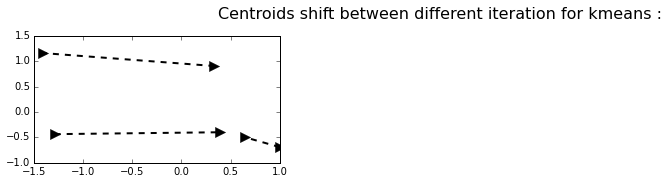

In [18]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle("Centroids shift between different iteration for kmeans :" , fontsize=16) 

init = [[ 0.39403195, -0.39763183], [ 0.64973894, -0.49877679], [-1.40973759,  1.1636137 ]]

cm0 = centroid_iris[0]
cm1 = init[0]

data = []
value = []
data.append(cm0[0])
data.append(cm1[0])

value.append(cm0[1])
value.append(cm1[1])

cm01 = centroid_iris[1]
cm11 = init[1]

data1 = []
value1 = []
data1.append(cm01[0])
data1.append(cm11[0])

value1.append(cm01[1])
value1.append(cm11[1])

cm02 = centroid_iris[2]
cm12 = init[2]

data2 = []
value2 = []
data2.append(cm02[0])
data2.append(cm12[0])

value2.append(cm02[1])
value2.append(cm12[1])

fig.add_subplot(231)
plt.plot(data, value, '-->', lw=2, color='black', ms=10)
plt.plot(data1, value1, '-->', lw=2, color='black', ms=10)
plt.plot(data2, value2, '-->', lw=2, color='black', ms=10)
plt.legend()

C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


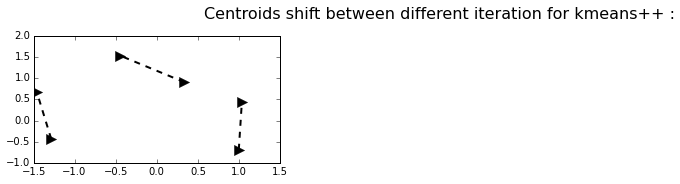

In [19]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle("Centroids shift between different iteration for kmeans++ :" , fontsize=16) 

init = [[-0.44346028,  1.53212805], [-1.46359829,  0.68151055], [ 1.03625692,  0.42984317]]

cm0 = centroid_iris_pp[0]
cm1 = init[0]

data = []
value = []
data.append(cm0[0])
data.append(cm1[0])

value.append(cm0[1])
value.append(cm1[1])

cm01 = centroid_iris_pp[1]
cm11 = init[1]

data1 = []
value1 = []
data1.append(cm01[0])
data1.append(cm11[0])

value1.append(cm01[1])
value1.append(cm11[1])

cm02 = centroid_iris_pp[2]
cm12 = init[2]

data2 = []
value2 = []
data2.append(cm02[0])
data2.append(cm12[0])

value2.append(cm02[1])
value2.append(cm12[1])

fig.add_subplot(231)
plt.plot(data, value, '-->', lw=2, color='black', ms=10)
plt.plot(data1, value1, '-->', lw=2, color='black', ms=10)
plt.plot(data2, value2, '-->', lw=2, color='black', ms=10)
plt.legend()

As we saw from the trajctory above that we can saw the kmeans++ have minor movement from the initail centroids to the final centroids, and however, the original kmeans will need more calculation to move the initila centrionds to the final correct locations.

Compare the different cluster numbers between kmeans and kmeans++ algorithm

C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


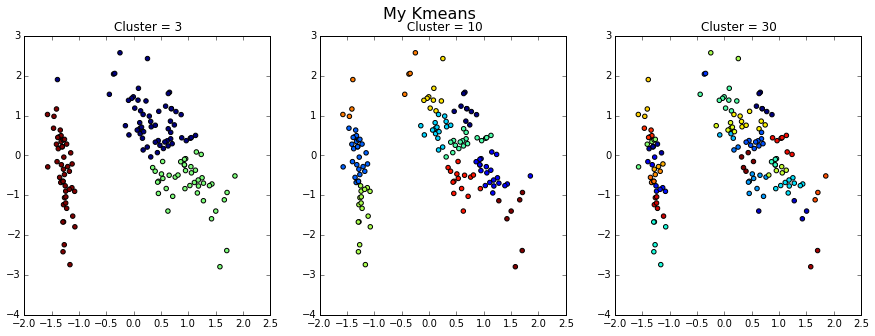

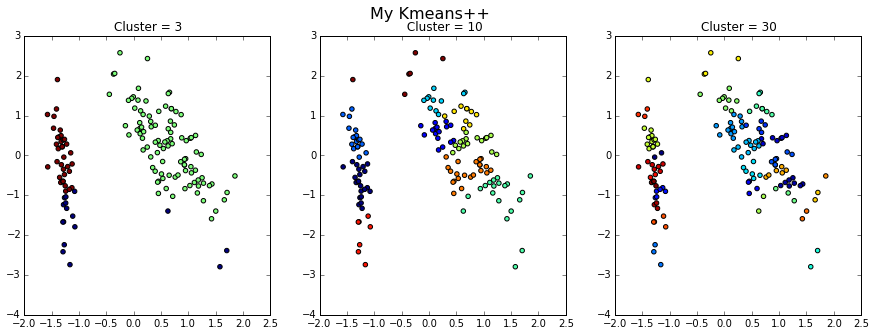

In [9]:
clust_3,centroid_3,lable_3 = mykmeans.kmeans(X_new, 3, rng, 50, method = 'kmeans')
clust_10,centroid_10,lable_10 = mykmeans.kmeans(X_new, 10, rng, 50, method = 'kmeans')
clust_30,centroid_30,lable_30 = mykmeans.kmeans(X_new, 30, rng, 50, method = 'kmeans')

fig = plt.figure(figsize=(15, 5))
fig.suptitle("My Kmeans" , fontsize=16) 

fig.add_subplot(131)
plt.title("Cluster = 3 ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_3)
plt.legend()


fig.add_subplot(132)
plt.title(" Cluster = 10 ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_10)
plt.legend()

fig.add_subplot(133)
plt.title("Cluster = 30 ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_30)
plt.legend()

fig.show()

clust_3,centroid_3,lable_3 = mykmeans.kmeans(X_new, 3, rng, 50, method = 'kmeans++')
clust_10,centroid_10,lable_10 = mykmeans.kmeans(X_new, 10, rng, 50, method = 'kmeans++')
clust_30,centroid_30,lable_30 = mykmeans.kmeans(X_new, 30, rng, 50, method = 'kmeans++')

fig = plt.figure(figsize=(15, 5))
fig.suptitle("My Kmeans++" , fontsize=16) 

fig.add_subplot(131)
plt.title("Cluster = 3 ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_3)
plt.legend()


fig.add_subplot(132)
plt.title(" Cluster = 10 ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_10)
plt.legend()

fig.add_subplot(133)
plt.title("Cluster = 30 ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_30)
plt.legend()

fig.show()

When original kmeans, the initail centroids will be choosen randamly. The final centroids decision will easily effect by the intial centroids choose. If the centriods choose in the beginning are very close to each other, the cluster way might cause certain area have higher cluster number, which will cause the cluster distribute not well enough. And that' why we introduce the kmeans++, which will choose the initial centroids based on the probability of distance between the data point to the first randamly choose centriod.

C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


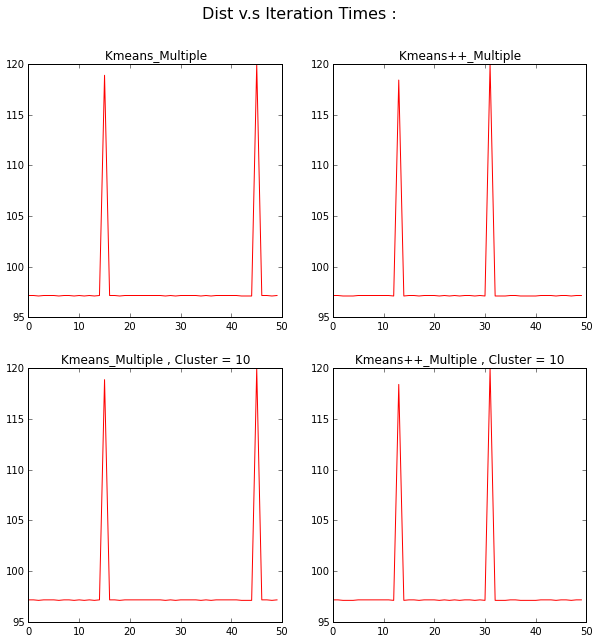

In [17]:

t = np.arange(0, 50, 1)
#print(len(t))
#print(len(dist_multi))
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Dist v.s Iteration Times : " , fontsize=16) 

fig.add_subplot(221)
plt.title("Kmeans_Multiple ")
plt.plot(t, dist_multi,color="red" )
plt.legend()

fig.add_subplot(222)
plt.title("Kmeans++_Multiple ")
plt.plot(t, dist_multipp,color="red" )
plt.legend()

fig.add_subplot(223)
plt.title("Kmeans_Multiple , Cluster = 10 ")
plt.plot(t, dist_multi,color="red" )
plt.legend()

fig.add_subplot(224)
plt.title("Kmeans++_Multiple , Cluster = 10")
plt.plot(t, dist_multipp,color="red" )
plt.legend()



Through the iteration v.s distortion (which is the data points to the centroids) , the value will be almost maintain in the certain value, and because we got the almost the same centroids in the end even we might have different initail centroids, the final result of each kmeans called will still tend to be converge to the same points (same features)

The Plot results and the confusion matrixs of kmeans and kmeans++ 

C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Normalized confusion matrix for kmeans
[[ 0.98  0.    0.02]
 [ 0.    0.28  0.72]
 [ 0.    0.6   0.4 ]]
Normalized confusion matrix for kmeans++
[[ 0.02  0.    0.98]
 [ 0.72  0.28  0.  ]
 [ 0.4   0.6   0.  ]]
Normalized confusion matrix for kmeans_multi
[[ 0.98  0.02  0.  ]
 [ 0.    0.72  0.28]
 [ 0.    0.4   0.6 ]]


C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


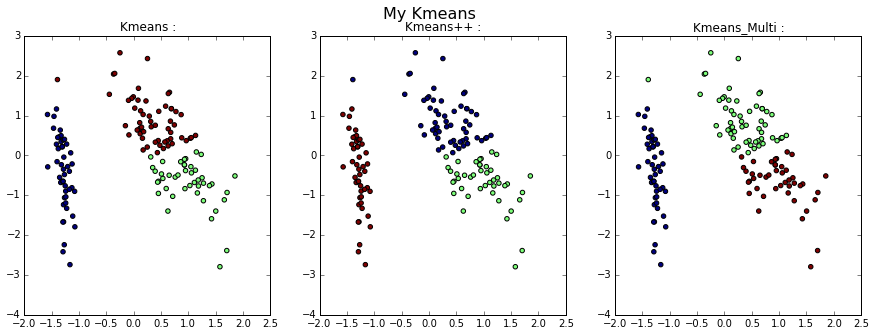

In [6]:

fig = plt.figure(figsize=(15, 5))
fig.suptitle("My Kmeans" , fontsize=16) 

fig.add_subplot(131)
plt.title("Kmeans : ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_iris)
plt.legend()


fig.add_subplot(132)
plt.title("Kmeans++ : ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_iris_pp)
plt.legend()

fig.add_subplot(133)
plt.title("Kmeans_Multi : ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_iris_multi)
plt.legend()

fig.show()


from sklearn import metrics
# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y, lable_iris)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for kmeans')
print(cm_normalized)

cm = metrics.confusion_matrix(y, lable_iris_pp)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for kmeans++')
print(cm_normalized)

cm = metrics.confusion_matrix(y, lable_iris_multi)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for kmeans_multi')
print(cm_normalized)


The run time after using optimized kmeans algorithm :

In [ ]:
start_time = time.time()
clust_iris,centroid_iris,lable_iris = mykmeans.kmeansopt(X_new, 3, rng, 50, method = 'kmeans')
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
clust_iris_pp,centroid_iris_pp,lable_iris_pp = mykmeans.kmeansopt(X_new, 3 , rng,  50, method = 'kmeans++')
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
clust_iris_multi,centroid_iris_multi,lable_iris_multi,dist_multi = mykmeans.Kmeans_multi(X_new, 3 , rng, 100)
print("--- %s seconds ---" % (time.time() - start_time))

100
100


C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


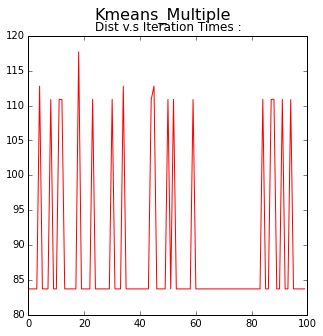

In [6]:
t = np.arange(0, 100, 1)
print(len(t))
print(len(dist_multi))
fig = plt.figure(figsize=(5, 5))
fig.suptitle("Kmeans_Multiple" , fontsize=16) 
plt.title("Dist v.s Iteration Times : ")
plt.plot(t, dist_multi,color="red" )
plt.legend()

In [ ]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle("My Kmeans" , fontsize=16) 

fig.add_subplot(131)
plt.title("Kmeans : ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_iris)
plt.legend()


fig.add_subplot(132)
plt.title("Kmeans++ : ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_iris_pp)
plt.legend()

fig.add_subplot(133)
plt.title("Kmeans_Multi : ")
plt.scatter(X_new[:,0] , X_new[:,1] , c= lable_iris_multi)
plt.legend()

fig.show()

from sklearn import metrics
# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y, lable_iris)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for kmeans')
print(cm_normalized)

cm = metrics.confusion_matrix(y, lable_iris_pp)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for kmeans++')
print(cm_normalized)

cm = metrics.confusion_matrix(y, lable_iris_multi)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for kmeans_multi')
print(cm_normalized)


Scikit Learn Comparision

dict_keys(['feature_names', 'data', 'target_names', 'target', 'DESCR'])
--- 0.5003540515899658 seconds ---
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]

C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


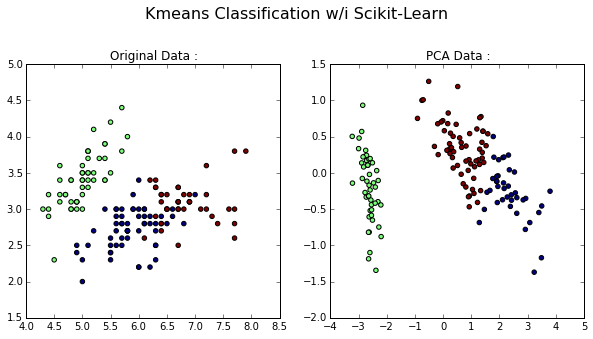

In [17]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# load iris data set
iris = load_iris()
X, y = iris.data, iris.target
print(iris.keys())
n_samples, n_features = iris.data.shape  # found out the number of samples and features

#######  Using PCA to trim the 4D into 2D locations
pca = PCA(n_components=2)                
#print(n_samples)
#print (X)
X_new = pca.fit_transform(X,y)
#print(X_new)
#print(n_features)
############  End of PCA  ###################
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
time.sleep(0.5)
print("--- %s seconds ---" % (time.time() - start_time))

labels = kmeans.fit_predict(X)
print(labels)

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Kmeans Classification w/i Scikit-Learn" , fontsize=16) 

fig.add_subplot(221)
plt.title("Original Data : ")
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.legend()



labels_pca = kmeans.fit_predict(X_new)
print(labels_pca)

fig.add_subplot(222)
plt.title("PCA Data : ")
plt.scatter(X_new[:, 0], X_new[:, 1], c=labels_pca)
plt.legend()

fig.show()

Final Check with Coufusion_Matrix for all the simulation that we've ran

In [5]:
from sklearn import metrics
# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y, lable_iris)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for kmeans')
print(cm_normalized)

cm = metrics.confusion_matrix(y, lable_iris_pp)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for kmeans++')
print(cm_normalized)

cm = metrics.confusion_matrix(y, lable_iris_multi)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for kmeans_multi')
print(cm_normalized)

cm = metrics.confusion_matrix(y, labels_pca)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix for scikit-learn kmeans')
print(cm_normalized)

Normalized confusion matrix for kmeans
[[ 0.58  0.2   0.22]
 [ 0.26  0.    0.74]
 [ 0.56  0.    0.44]]
Normalized confusion matrix for kmeans++
[[ 0.    1.    0.  ]
 [ 1.    0.    0.  ]
 [ 0.58  0.    0.42]]
Normalized confusion matrix for kmeans_multi
[[ 1.    0.    0.  ]
 [ 0.    0.94  0.06]
 [ 0.    0.28  0.72]]


NameError: name 'labels_pca' is not defined

For my own simple test

Already Coverage , break
This is Kmeans++
Already Coverage , break
This is Kmeans_Multi
CLUST1 :
[[[1, 1], [2, 1], [1, 2], [5, 1], [3, 1]], [[4, 3], [5, 4], [4, 4]]]
ORIGINAL :
[[1, 1], [2, 1], [4, 3], [5, 4], [1, 2], [5, 1], [4, 4], [3, 1]]
LABLE1 :
[0, 0, 1, 1, 0, 0, 1, 0]
CLUST2 :
[[[1, 1], [2, 1], [1, 2], [3, 1]], [[4, 3], [5, 4], [5, 1], [4, 4]]]
ORIGINAL :
[[1, 1], [2, 1], [4, 3], [5, 4], [1, 2], [5, 1], [4, 4], [3, 1]]
LABLE2 :
[0, 0, 1, 1, 0, 1, 1, 0]
CLUST3 :
[[[1, 1], [2, 1], [4, 3], [5, 4], [1, 2], [5, 1], [4, 4], [3, 1]], []]
ORIGINAL :
[[1, 1], [2, 1], [4, 3], [5, 4], [1, 2], [5, 1], [4, 4], [3, 1]]
LABLE2 :
[0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\howfungirl\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\howfungirl\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


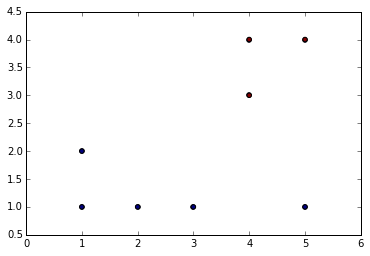

In [2]:

filelist = [[1, 1], [2,1] , [4,3] , [5,4] , [1, 2], [5,1] , [4,4] , [3,1]]
filelist_matrix = np.matrix(filelist)



plt.scatter(filelist_matrix[:,0] , filelist_matrix[:,1])

clust1,centroid1 ,lable1 = mykmeans.kmeansopt(filelist, 2 , rng, 50 , method = 'kmeans')
clust2,centroid2 , lable2 = mykmeans.kmeansopt(filelist, 2 , rng, 50 , method = 'kmeans++')
clust3, centroid3 , lable3, dist = mykmeans.Kmeans_multi(filelist, 2 , rng, 50 )

print("CLUST1 :")
print(clust1)
#plot_result(clust1)
print("ORIGINAL :")
print(filelist)
print("LABLE1 :")
print(lable1)

print("CLUST2 :")
print(clust2)
#plot_result(clust1)
print("ORIGINAL :")
print(filelist)
print("LABLE2 :")
print(lable2)

print("CLUST3 :")
print(clust3)
#plot_result(clust1)
print("ORIGINAL :")
print(filelist)
print("LABLE2 :")
print(lable3)

plt.scatter(filelist_matrix[:,0] , filelist_matrix[:,1] , c= lable1)

In [ ]:
'''
###  Backup Script ###

%matplotlib inline
import matplotlib.pyplot as plt

def plot_result(clust):
    value = []
    lable = []

    for num in range(0,len(clust)):
        print(num)
        for ld in clust[num]:
            print(ld )
            value.append(ld)
            lable.append(num)

    value = np.matrix(value)

    print(value)
    print(lable)
    #value = np.matrix(clust)
    plt.scatter(value[:,0] , value[:,1] , c= lable)
    
'''
